# K-means

This notebook illustrates the clustering of a graph by k-means.

In [1]:
import numpy as np
%matplotlib inline

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = np.array(['r', 'b', 'g', 'c', 'm', 'y'])

## Undirected graphs

**Loading**

In [3]:
graph = skn.data.KarateClub()
adjacency = graph.adjacency
labels_true = graph.labels

**Clustering**

In [4]:
kmeans = skn.clustering.KMeans(embedding_method=skn.embedding.GSVD(3), n_clusters = 2)
labels = kmeans.fit_transform(adjacency)

In [5]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1] [20 14]


**Visualization**

In [6]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


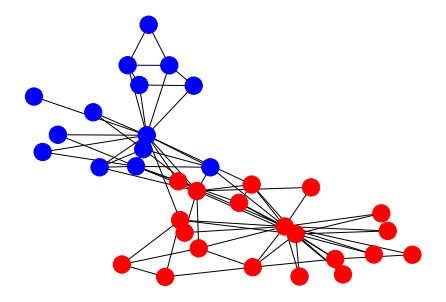

In [7]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=COLORS[labels])

**Metrics**

In [8]:
modularity = skn.clustering.modularity

In [9]:
modularity(adjacency, labels)

0.34048323471400377

**Parameters**

In [10]:
kmeans = skn.clustering.KMeans(n_clusters = 4)
labels = kmeans.fit_transform(adjacency)
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [17 10  4  3]


## Directed graphs

**Loading**

In [11]:
graph = skn.data.Painters()
adjacency = graph.adjacency
names = graph.names
pos = graph.pos

**Clustering**

In [12]:
# apply spectral clustering for the equivalent bipartite graph
bikmeans = skn.clustering.BiKMeans(embedding_method=skn.embedding.GSVD(3), n_clusters = 4)
bikmeans.fit(adjacency)

BiKMeans(n_clusters=4, embedding_method=GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=LanczosSVD()), cluster_both=False, sort_clusters=True, return_graph=False)

In [13]:
labels = bikmeans.labels_
print(labels)

[0 0 1 0 1 1 0 2 0 1 2 0 0 3]


**Visualization**

In [14]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


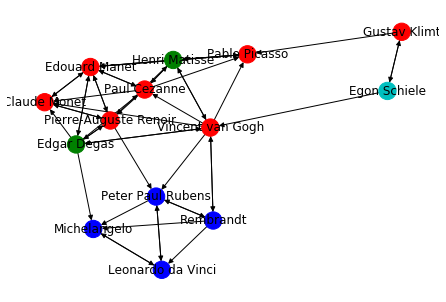

In [15]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels], labels={i:name for i, name in enumerate(names)})

**Metrics**

In [16]:
modularity(adjacency, labels)

0.11680000000000007

## Bipartite graphs

**Loading**

In [17]:
graph = skn.data.MovieActor()
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col
n1, n2 = biadjacency.shape

**Clustering**

In [18]:
bikmeans = skn.clustering.BiKMeans(embedding_method=skn.embedding.GSVD(3), n_clusters=4, cluster_both=True)
bikmeans.fit(biadjacency)

BiKMeans(n_clusters=4, embedding_method=GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=LanczosSVD()), cluster_both=True, sort_clusters=True, return_graph=False)

In [19]:
labels_row = bikmeans.labels_row_
labels_col = bikmeans.labels_col_
labels = np.hstack((labels_row, labels_col))
print(labels_row, labels_col)

[3 3 0 0 2 0 0 0 1 2 1 1 1 2 2] [2 3 3 3 0 3 0 0 0 1 1 2 2 1 2 1]


**Visualization**

In [20]:
adjacency = skn.utils.bipartite2undirected(biadjacency)
graph = nx.from_scipy_sparse_matrix(adjacency)

In [21]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [22]:
names = {i: movie for i, movie in enumerate(movies)}
names.update({n1 + i: actor for i, actor in enumerate(movies)})

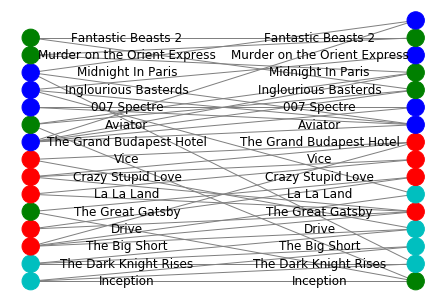

In [23]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

**Metrics**

In [24]:
skn.clustering.bimodularity(biadjacency, labels_row, labels_col)

0.5312314098750743